<a href="https://colab.research.google.com/github/rsharanesh/Regression-ai1-fall2019/blob/master/lab_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, # one type of x
                       noise=20,
                       random_state=2017,
                       coef=True)
#creates a data to 
#chose random data set

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [7]:
X.shape

(100, 1)

In [8]:
X

array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

We are fitting a model with an intercept. Lets see what it is.

In [9]:
coef
#this is the intercept of the model

array(80.88336208)

We can plot the data.

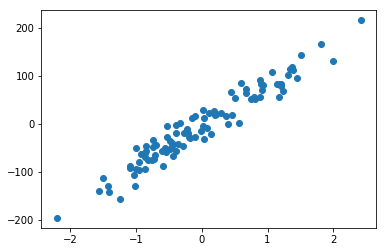

In [12]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

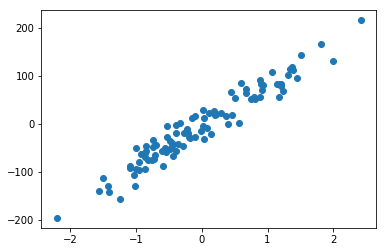

In [13]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)
plt.plot(X,y, 'o');

In [14]:
Xgrid
#we are dividing the Grpah sheet


array([[-2.5       ],
       [-2.49499499],
       [-2.48998999],
       [-2.48498498],
       [-2.47997998],
       [-2.47497497],
       [-2.46996997],
       [-2.46496496],
       [-2.45995996],
       [-2.45495495],
       [-2.44994995],
       [-2.44494494],
       [-2.43993994],
       [-2.43493493],
       [-2.42992993],
       [-2.42492492],
       [-2.41991992],
       [-2.41491491],
       [-2.40990991],
       [-2.4049049 ],
       [-2.3998999 ],
       [-2.39489489],
       [-2.38988989],
       [-2.38488488],
       [-2.37987988],
       [-2.37487487],
       [-2.36986987],
       [-2.36486486],
       [-2.35985986],
       [-2.35485485],
       [-2.34984985],
       [-2.34484484],
       [-2.33983984],
       [-2.33483483],
       [-2.32982983],
       [-2.32482482],
       [-2.31981982],
       [-2.31481481],
       [-2.30980981],
       [-2.3048048 ],
       [-2.2997998 ],
       [-2.29479479],
       [-2.28978979],
       [-2.28478478],
       [-2.27977978],
       [-2

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression


In [17]:
lr = LinearRegression()#lr is a instance of class or object of the class
lr.fit(X,y)# we are fitting the existing data
ypgrid = lr.predict(Xgrid)# plotting the generated one with the newly gnreated points
lr.coef_, lr.intercept_
# we are getting some noise due to which the values are changed friom the original one 

(array([82.90456142]), -3.709228868670302)

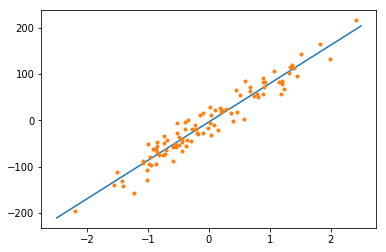

In [19]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y, lr.predict(X))# this one compares the model with the mean of tge dtat set
#  finding r2 with the same data swt that we trained is not a good one
lr.score(X,y)

0.9342344891672816

In [24]:
lr.score(X,y)

0.9342344891672816

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [28]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices#spliiting the data set

array([13, 91, 46, 31, 85, 71, 90, 93, 85, 74, 57,  0, 67, 84, 80, 75, 48,
       53, 80, 53])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [30]:
lr_s = LinearRegression().fit(Xsample, ysample)#doing liner reg 
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)#calculating the r2 value

(0.9690382128197904, 0.9690382128197904)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

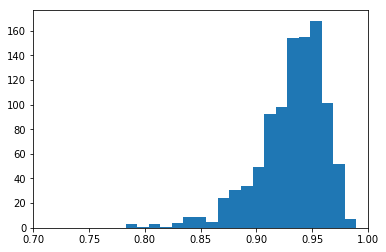

In [31]:
scores = []#list
for i in range(1000):# doing 1000 times
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))#linear reg and find r2 values
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

(0, 1)

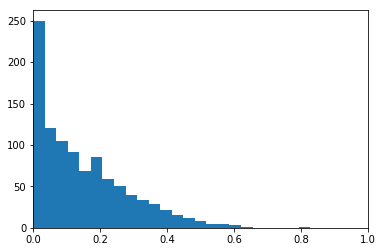

In [39]:
# your code here
Xnew, ynew, coef = make_regression(n_samples = 100, 
                       n_features=1, # one type of x
                       noise=300,
                       random_state=2017,
                       coef=True)
xnewgrid = np.linspace(-2.5,2.5,1000)
Xnewgrid = xgrid.reshape(-1,1)
scoresnew = []#list
for i in range(1000):# doing 1000 times
    sample_indicesnew = np.random.choice(range(100), size=20)
    Xnewsample = Xnew[sample_indicesnew]
    ynewsample = ynew[sample_indicesnew]
    scoresnew.append(LinearRegression().fit(Xnewsample, ynewsample).score(Xnewsample, ynewsample))#linear reg and find r2 values
plt.hist(scoresnew,  bins=np.linspace(0, 1, 30))
plt.xlim(0,1)

(0, 1)

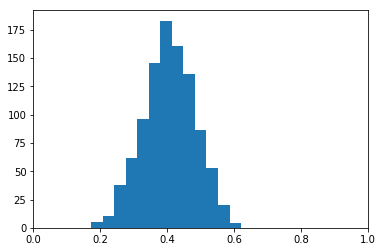

In [58]:
# your code here
Xnew, ynew, coef = make_regression(n_samples = 100, 
                       n_features=1, # one type of x
                       noise=100,
                       random_state=2017,
                       coef=True)
xnewgrid = np.linspace(-2.5,2.5,1000)
Xnewgrid = xgrid.reshape(-1,1)
scoresnew = []#list
for i in range(1000):# doing 1000 times
    sample_indicesnew = np.random.choice(range(100), size=100)
    Xnewsample = Xnew[sample_indicesnew]
    ynewsample = ynew[sample_indicesnew]
    scoresnew.append(LinearRegression().fit(Xnewsample, ynewsample).score(Xnewsample, ynewsample))#linear reg and find r2 values
plt.hist(scoresnew,  bins=np.linspace(0, 1, 30))
plt.xlim(0,1)

(0.7, 1)

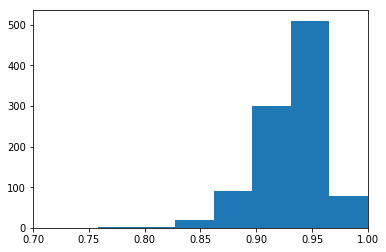

In [69]:
# your code here
from sklearn.utils import resample
Xnew, ynew, coef = make_regression(n_samples = 100, 
                       n_features=1, # one type of x
                       noise=20,
                       random_state=2017,
                       coef=True)
xnewgrid = np.linspace(-2.5,2.5,1000)
Xnewgrid = xgrid.reshape(-1,1)
scoresnew = []#list
for i in range(1000):# doing 1000 times
    sample_indicesnew = np.random.choice(range(100), size=20,replace=True)
    Xnewsample = Xnew[sample_indicesnew]
    ynewsample = ynew[sample_indicesnew]
    #xboot=resample(data, replace=True, n_samples=4, random_state=1)
    scoresnew.append(LinearRegression().fit(Xnewsample, ynewsample).score(Xnewsample, ynewsample))#linear reg and find r2 values
plt.hist(scoresnew,  bins=np.linspace(0, 1, 30))
plt.xlim(0.7,1)

In [61]:
for i in range(10):# doing 1000 times
    sample_indicesnew = np.random.choice(range(10), size=10,replace=True)
    print(sample_indicesnew)

[8 9 6 9 9 6 3 0 5 1]
[8 3 9 6 7 6 7 2 3 5]
[5 7 3 9 6 2 7 2 2 0]
[5 8 2 7 0 7 6 6 4 8]
[3 6 9 3 4 4 6 5 2 6]
[0 7 8 4 2 6 6 9 6 1]
[9 6 7 7 0 1 2 6 9 1]
[5 3 2 2 1 9 5 8 1 1]
[4 8 6 4 8 2 3 6 3 5]
[6 6 8 8 6 1 2 7 8 4]


In [59]:

# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


In [0]:
# your code here


## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()